In [1]:
!wget https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_russian_plate_number.xml

--2023-10-24 03:20:58--  https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244988 (239K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml’

haarcascade_russian 100%[===================>] 239.25K  --.-KB/s    in 0.1s    

2023-10-24 03:20:59 (2.38 MB/s) - ‘haarcascade_russian_plate_number.xml’ saved [244988/244988]



In [2]:
!wget https://www.dropbox.com/s/4hbem2kxzqcwo0y/car1.jpg

--2023-10-24 03:20:59--  https://www.dropbox.com/s/4hbem2kxzqcwo0y/car1.jpg
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/4hbem2kxzqcwo0y/car1.jpg [following]
--2023-10-24 03:20:59--  https://www.dropbox.com/s/raw/4hbem2kxzqcwo0y/car1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc404eafb0d027b38576859fd4c1.dl.dropboxusercontent.com/cd/0/inline/CGLrcjHw0fad5HdnBMLf64sg8PYXOVX5zWBCCl8bfHxBArxQgFERECBa-GlgtxOk7BRonsFv_7WAotS6eXhxvG9IoXNXUaQgk9pm0zJSR6QrJMIhaM2DgisQOvYT5xZLXchOjYCY9G4NDSY5pg6dM_su/file# [following]
--2023-10-24 03:21:00--  https://uc404eafb0d027b38576859fd4c1.dl.dropboxusercontent.com/cd/0/inline/CGLrcjHw0fad5HdnBMLf64sg8PYXOVX5zWBCCl8bfHxBArxQgFERECBa-GlgtxOk7BRonsFv_7WAotS6eXhxvG9IoXNXUaQgk9pm0zJSR6QrJMIhaM

In [3]:
!pip install -q torch_snippets
from torch_snippets import *

plate_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_russian_plate_number.xml')
image = read("car1.jpg", 1)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.4/65.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 53.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 96.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 84.9 MB/s eta 0:

In [4]:
image_gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [5]:
plates = plate_cascade.detectMultiScale(image_gray, 1.08, 2, minSize=(40, 40),
                                        maxSize=(1000, 100))

851 242 144 48

153 39 189 63

992 549 163 54

380 1379 159 53

449 1418 167 56

473 1455 223 74

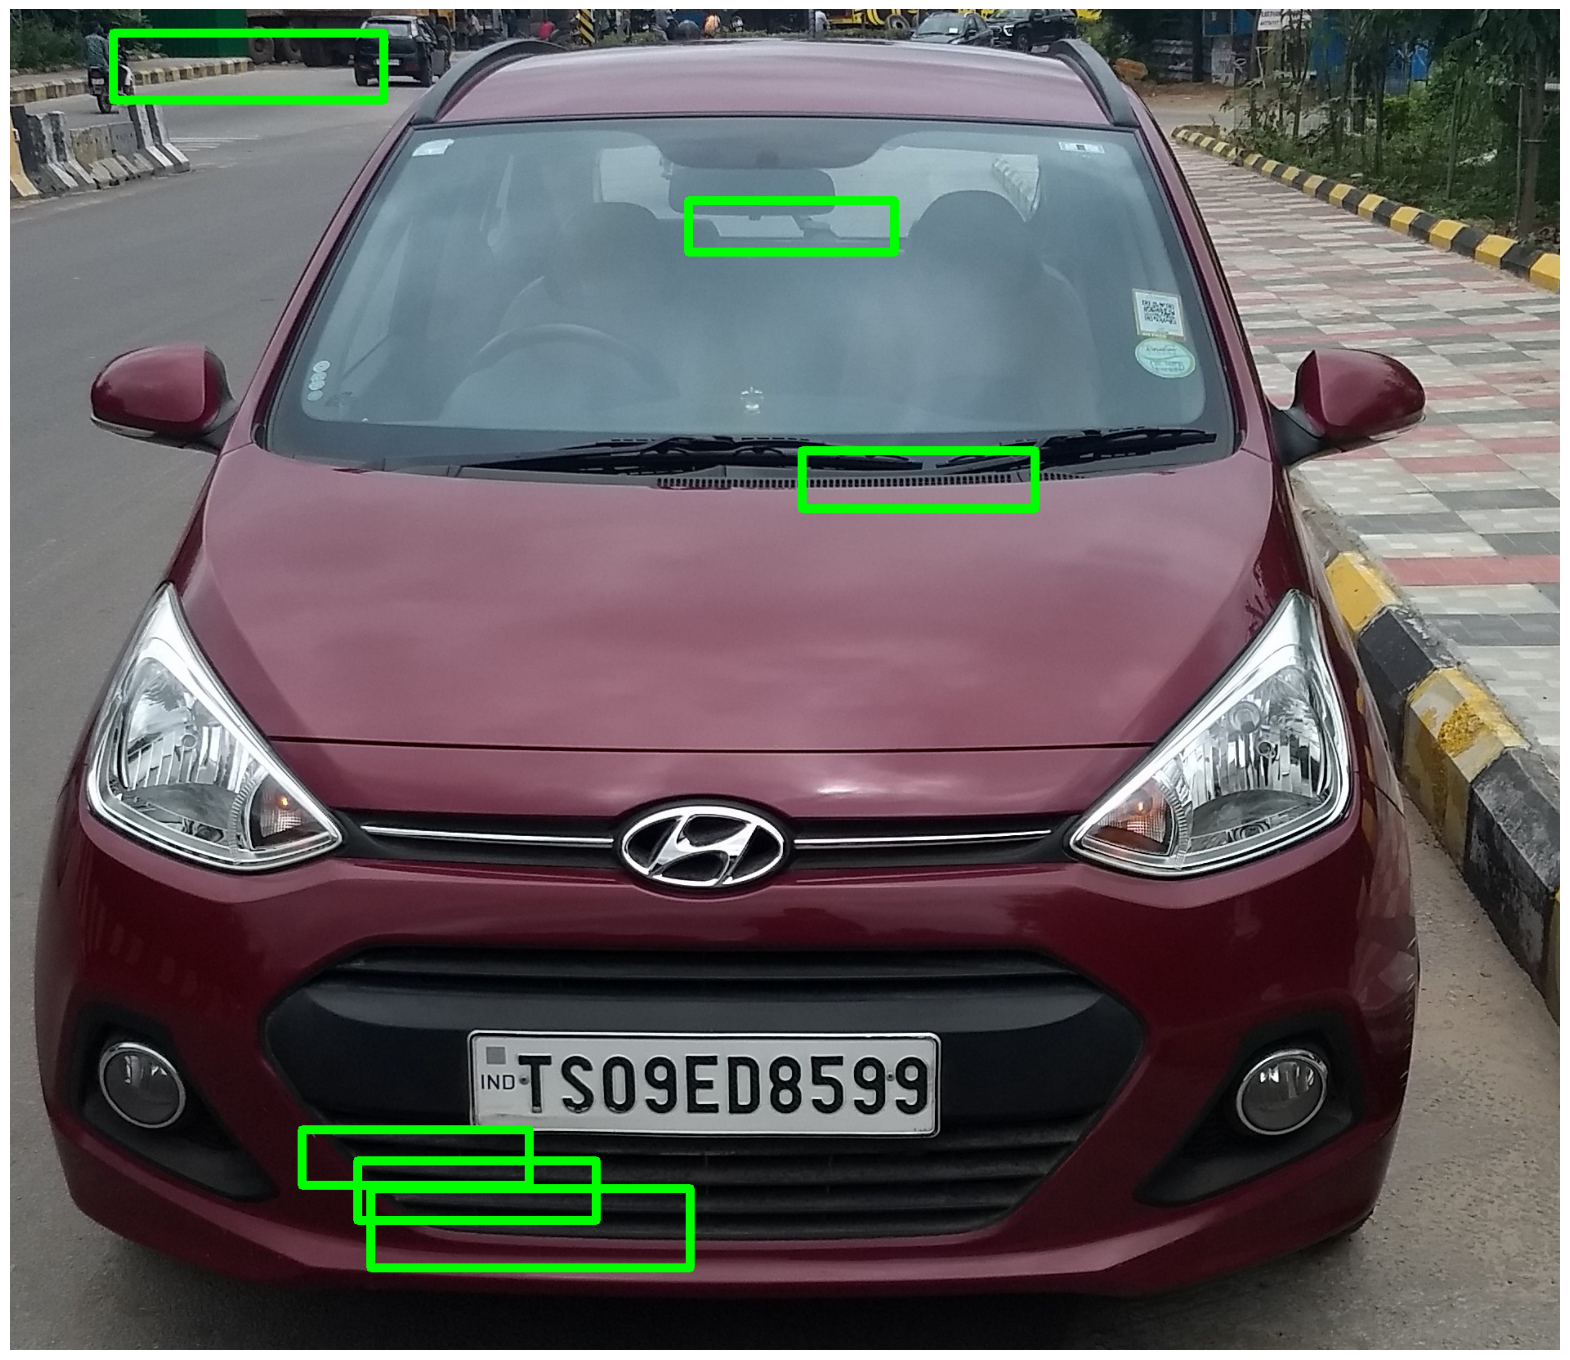

In [6]:
image2 = image.astype('uint8')
for (x, y, w, h) in plates:
    print(x,y,w,h)
    x -= w * 0.14
    w += w * 0.75
    y -= h * 0.15
    h += h * 0.3
    cv2.rectangle(image2, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 10)
show(image2)

---